In [153]:
import uncertainties as unc  
import uncertainties.unumpy as unumpy  
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize as optimize
import math

1499.0
Gaussian Fit
Mean: 3.45204493890021 +/- 0.12725227524337093
Std: 1.8171008771998356 +/- 0.11090335159827996
--------------------------------------------------
Poisson Fit
Mean: 3.5908443177178633 +/- 0.08421394753579069
1499.0
Gaussian Fit
Mean: 3.5260359990973424 +/- 0.12765897024648848
Std: 1.8112702486400547 +/- 0.11205723185554248
--------------------------------------------------
Poisson Fit
Mean: 3.65786553899736 +/- 0.08750689865595841
1499.0
Gaussian Fit
Mean: 3.6079284791625326 +/- 0.10409083607144821
Std: 1.731970270417973 +/- 0.08758960179614644
--------------------------------------------------
Poisson Fit
Mean: 3.706145700910828 +/- 0.10648451289598501
1499.0
Gaussian Fit
Mean: 3.45204493890021 +/- 0.12725227524337093
Std: 1.8171008771998356 +/- 0.11090335159827996
--------------------------------------------------
Poisson Fit
Mean: 3.5908443177178633 +/- 0.08421394753579069


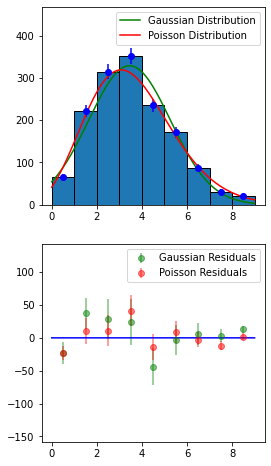

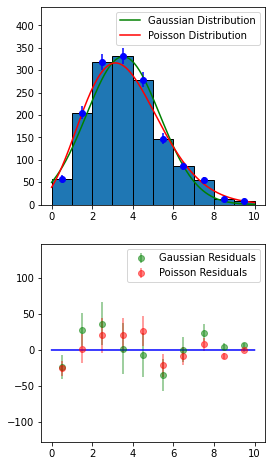

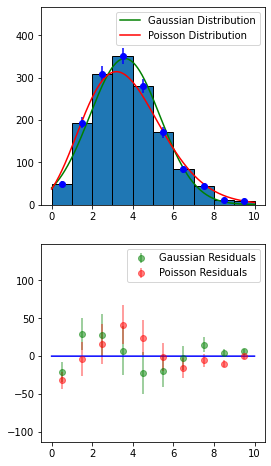

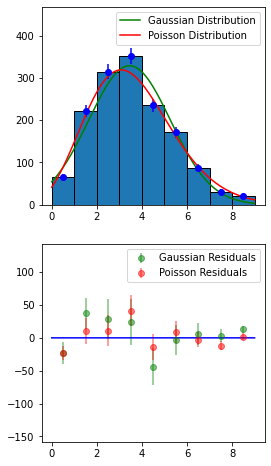

In [161]:
def Gaussian(x, mean, std,A):
    return A*(1/(std*(2*np.pi)**0.5))*np.exp(-(x-mean)**2/(2* std**2))
def Poisson(x,mu,A):
    return A*(mu**x/scipy.special.factorial(x)) * np.exp(-mu)
def uGaussian(x, mean, std, A):
    return A*(1/(std*(2*np.pi)**0.5))*unumpy.exp(-(x-mean)**2/(2* std**2))
def uPoisson(x,mu, A):
    return A*(mu**x/scipy.special.factorial(x)) * unumpy.exp(-mu)

E1 = []
E1.append(np.genfromtxt("E1.csv", delimiter=",", usecols=(1), skip_header=1))
E1.append(np.genfromtxt("E1.csv", delimiter=",", usecols=(3), skip_header=1))
E1.append(np.genfromtxt("E1.csv", delimiter=",", usecols=(5), skip_header=1))
E1_sum = E1[0]
np.append(E1_sum,E1[1])
np.append(E1_sum,E1[2])
E1.append(E1_sum)
for x in E1:
    plt.figure(figsize=(4, 8))
    plt.subplot(2,1,1)
    n,bins,patches = plt.hist(x, density=False, edgecolor='black', bins = np.arange(min(x),max(x),1))
    x = np.linspace(min(bins)+0.5,max(bins)-0.5,len(n))
    nerr=n**0.5
    norm = sum(n)
    plt.errorbar(x,n,yerr=nerr,fmt='ob')
    popt,pcov = optimize.curve_fit(Gaussian,xdata=x, ydata=n,p0=[3.5,1,norm],bounds=((-np.inf,-np.inf,norm-0.0001), (np.inf,np.inf,norm)),sigma=nerr)
    perr = np.sqrt(np.diag(pcov))
    print("Gaussian Fit")
    print('Mean: '+str(popt[0])+' +/- '+str(perr[0]))
    print('Std: '+str(popt[1])+' +/- '+str(perr[1]))
    print('-'*50)
    gpopt=popt
    gperr=perr
    popt,pcov = optimize.curve_fit(Poisson,xdata=x, ydata=n, p0=[3.5,norm],bounds=((-np.inf,norm-0.0001), (np.inf,norm)),sigma=nerr)
    perr = np.sqrt(np.diag(pcov))
    print("Poisson Fit")
    print('Mean: '+str(popt[0])+' +/- '+str(perr[0]))
    print('='*50)
    ppopt=popt
    pperr=perr
    xs = np.linspace(min(bins),max(bins),2000)
    plt.plot(xs,Gaussian(xs,gpopt[0],gpopt[1],gpopt[2]),color='g',label='Gaussian Distribution')
    plt.plot(xs,Poisson(xs,ppopt[0],ppopt[1]),color='r',label='Poisson Distribution')
    gaussian_point=uGaussian(x,unc.ufloat(gpopt[0],gperr[0]),unc.ufloat(gpopt[1],gperr[1]),unc.ufloat(gpopt[2],gperr[2]))
    poisson_point=uPoisson(x,unc.ufloat(ppopt[0],pperr[0]),unc.ufloat(ppopt[1],pperr[1]))
    plt.legend(loc='upper right')
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin * 1.2, ymax * 1.2)
    plt.subplot(2,1,2)
    u_n=[]
    for i in np.linspace(0,len(n)-1,len(n)):
        i=int(i)
        u_n.append(unc.ufloat(n[i],nerr[i]))
    plt.errorbar(x, unumpy.nominal_values(u_n-gaussian_point),yerr=unumpy.std_devs(u_n-gaussian_point) ,fmt='go', alpha=0.5 ,label = "Gaussian Residuals")
    plt.errorbar(x, unumpy.nominal_values(u_n-poisson_point),yerr=unumpy.std_devs(u_n-poisson_point) ,fmt='ro', alpha=0.5 ,label = "Poisson Residuals")
    plt.plot(xs,[0]*xs,'b')
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin * 2, ymax * 2)
    plt.legend()
    plt.show

Gaussian Fit
Mean: 31.670952230131775 +/- 0.4463551219165789
Std: 5.435742175311286 +/- 0.45792962883264604
--------------------------------------------------
Poisson Fit
Mean: 31.878962675632103 +/- 0.4635509487015774
Gaussian Fit
Mean: 32.0938830722197 +/- 0.552030071570395
Std: 5.456946937126814 +/- 0.5583989749488534
--------------------------------------------------
Poisson Fit
Mean: 32.37624389318487 +/- 0.5731195096753108
Gaussian Fit
Mean: 31.604296769804 +/- 0.6964134839940502
Std: 6.058361628059226 +/- 0.7406546260795409
--------------------------------------------------
Poisson Fit
Mean: 31.94211251459437 +/- 0.6249296478140071
Gaussian Fit
Mean: 31.670952230131775 +/- 0.4463551219165789
Std: 5.435742175311286 +/- 0.45792962883264604
--------------------------------------------------
Poisson Fit
Mean: 31.878962675632103 +/- 0.4635509487015774


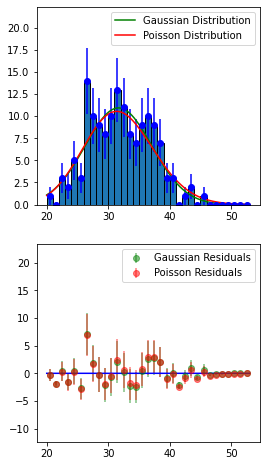

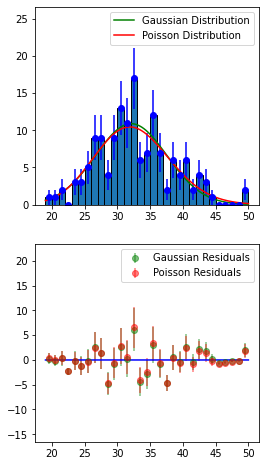

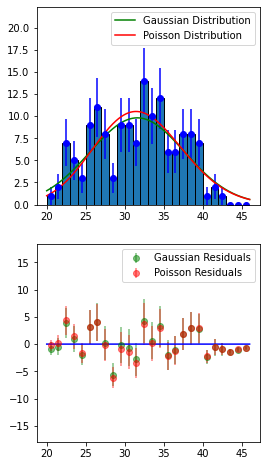

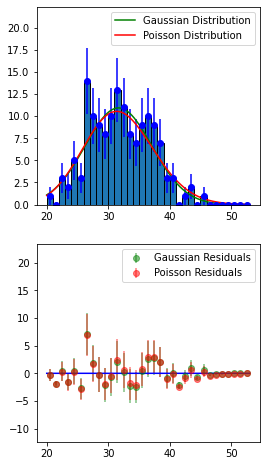

In [163]:
E2 = []
E2.append(np.genfromtxt("E2.csv", delimiter=",", usecols=(1), skip_header=1))
E2.append(np.genfromtxt("E2.csv", delimiter=",", usecols=(3), skip_header=1))
E2.append(np.genfromtxt("E2.csv", delimiter=",", usecols=(5), skip_header=1))
E2_sum = E2[0]
np.append(E2_sum,E2[1])
np.append(E2_sum,E2[2])
E2.append(E2_sum)
for x in E2:
    plt.figure(figsize=(4, 8))
    plt.subplot(2,1,1)
    n,bins,patches = plt.hist(x, density=False, edgecolor='black', bins = np.arange(min(x),max(x),1))
    x = np.linspace(min(bins)+0.5,max(bins)-0.5,len(n))
    nerr=n**0.5
    norm=sum(n)
    plt.errorbar(x,n,yerr=nerr,fmt='ob')
    popt,pcov = optimize.curve_fit(Gaussian,xdata=x, ydata=n,p0=[31,5,norm],bounds=((-np.inf,-np.inf,norm-0.0001), (np.inf,np.inf,norm)))
    perr = np.sqrt(np.diag(pcov))
    print("Gaussian Fit")
    print('Mean: '+str(popt[0])+' +/- '+str(perr[0]))
    print('Std: '+str(popt[1])+' +/- '+str(perr[1]))
    print('-'*50)
    gpopt=popt
    gperr=perr
    popt,pcov = optimize.curve_fit(Poisson,xdata=x, ydata=n, p0=[31,norm],bounds=((-np.inf,norm-0.0001), (np.inf,norm)))
    perr = np.sqrt(np.diag(pcov))
    print("Poisson Fit")
    print('Mean: '+str(popt[0])+' +/- '+str(perr[0]))
    print('='*50)
    ppopt=popt
    pperr=perr
    xs = np.linspace(min(bins),max(bins),2000)
    plt.plot(xs,Gaussian(xs,gpopt[0],gpopt[1],gpopt[2]),color='g',label='Gaussian Distribution')
    plt.plot(xs,Poisson(xs,ppopt[0],ppopt[1]),color='r',label='Poisson Distribution')
    gaussian_point=uGaussian(x,unc.ufloat(gpopt[0],gperr[0]),unc.ufloat(gpopt[1],gperr[1]),unc.ufloat(gpopt[2],gperr[2]))
    poisson_point=uPoisson(x,unc.ufloat(ppopt[0],pperr[0]),unc.ufloat(ppopt[1],pperr[1]))
    plt.legend(loc='upper right')
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin * 1.2, ymax * 1.2)
    plt.subplot(2,1,2)
    u_n=[]
    for i in np.linspace(0,len(n)-1,len(n)):
        i=int(i)
        u_n.append(unc.ufloat(n[i],nerr[i]))
    plt.errorbar(x, unumpy.nominal_values(u_n-gaussian_point),yerr=unumpy.std_devs(u_n-gaussian_point) ,fmt='go', alpha=0.5 ,label = "Gaussian Residuals")
    plt.errorbar(x, unumpy.nominal_values(u_n-poisson_point),yerr=unumpy.std_devs(u_n-poisson_point) ,fmt='ro', alpha=0.5 ,label = "Poisson Residuals")
    plt.plot(xs,[0]*xs,'b')
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin * 2, ymax * 2)
    plt.legend()
    plt.show

Gaussian Fit
Mean: 1.8336183429935184 +/- 0.2700214519375194
Std: 1.4187082222069678 +/- 0.28357521085055754
--------------------------------------------------
Poisson Fit
Mean: 2.0995112133292473 +/- 0.12601571802248646
Gaussian Fit
Mean: 1.832597559610387 +/- 0.18384438760421593
Std: 1.3902977591781387 +/- 0.164599509015263
--------------------------------------------------
Poisson Fit
Mean: 2.0290604145612936 +/- 0.09324009597668227
Gaussian Fit
Mean: 1.8976383916342756 +/- 0.19304233754402278
Std: 1.3785549305749973 +/- 0.19883471451404477
--------------------------------------------------
Poisson Fit
Mean: 2.1320966236499626 +/- 0.11511014682082997
Gaussian Fit
Mean: 1.9022427467943017 +/- 0.1718275620179802
Std: 1.3552715045437105 +/- 0.17371031892219793
--------------------------------------------------
Poisson Fit
Mean: 2.124551039739232 +/- 0.11839377218857479
Gaussian Fit
Mean: 1.859421967463347 +/- 0.13815596335602176
Std: 1.4057022860636885 +/- 0.11526100008580321
---------

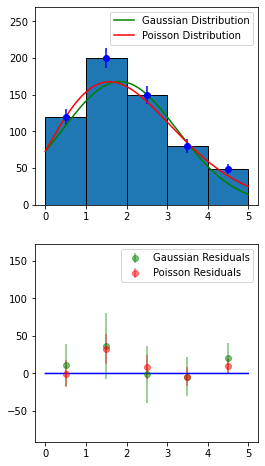

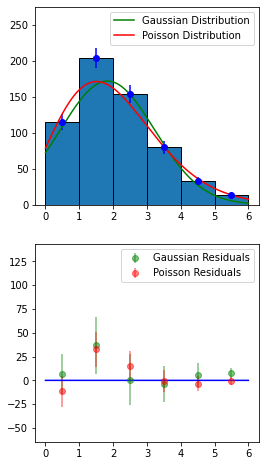

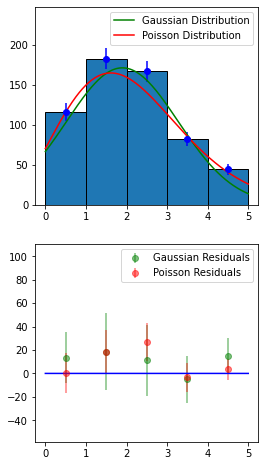

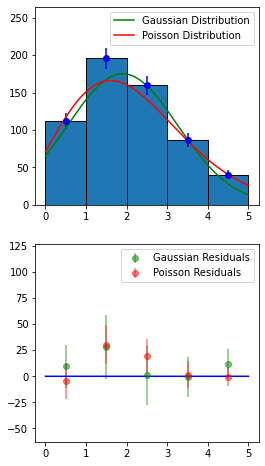

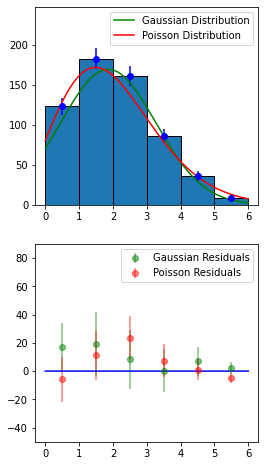

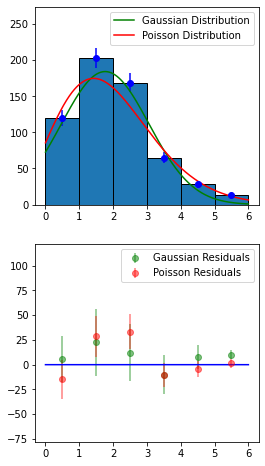

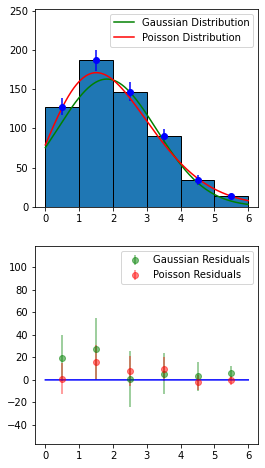

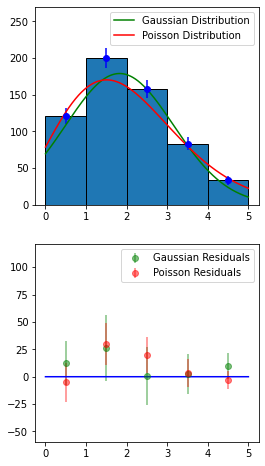

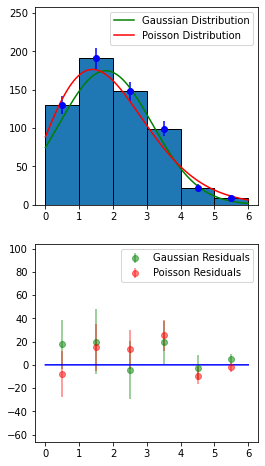

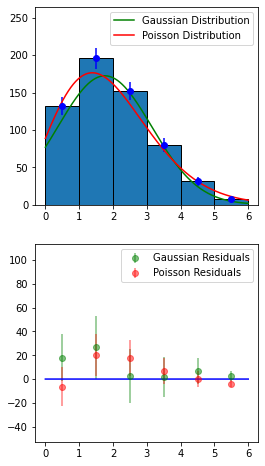

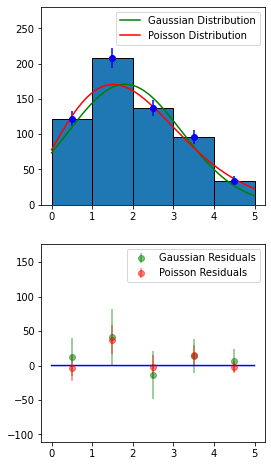

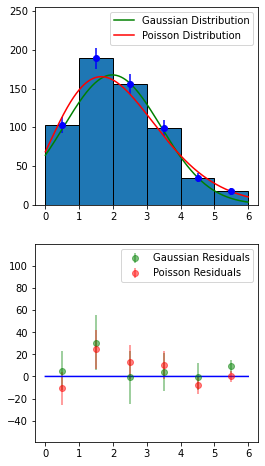

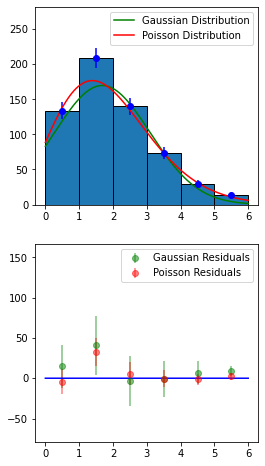

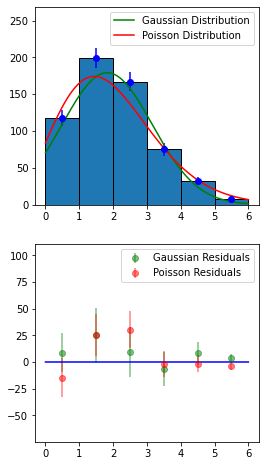

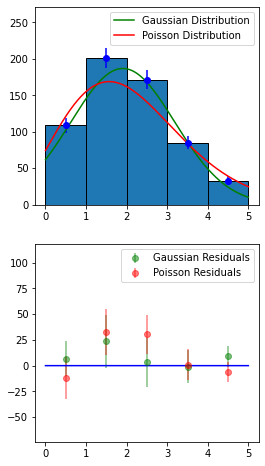

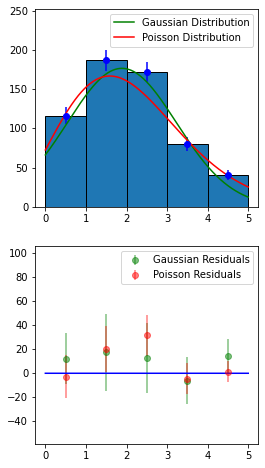

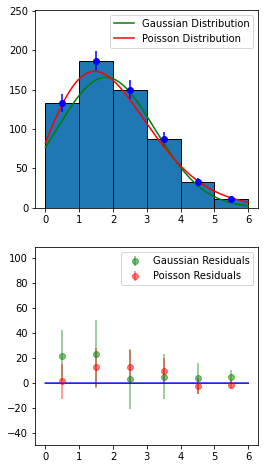

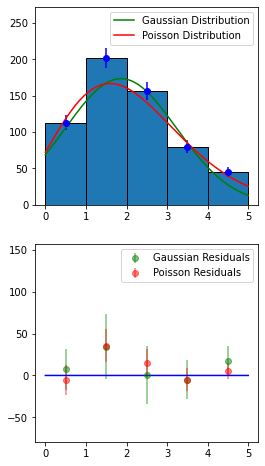

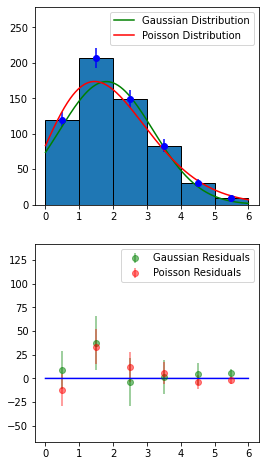

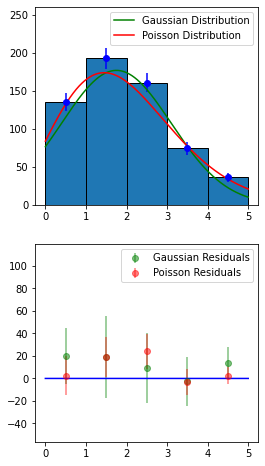

In [164]:
E3 = []
for i in range(1,41,2):
    E3.append(np.genfromtxt("E3.csv", delimiter=",", usecols=(i), skip_header=1))
for x in E3:
    plt.figure(figsize=(4, 8))
    plt.subplot(2,1,1)
    n,bins,patches = plt.hist(x, density=False, edgecolor='black', bins = np.arange(min(x),max(x),1))
    x = np.linspace(min(bins)+0.5,max(bins)-0.5,len(n))
    nerr=n**0.5
    norm=sum(n)
    plt.errorbar(x,n,yerr=nerr,fmt='ob')
    popt,pcov = optimize.curve_fit(Gaussian,xdata=x, ydata=n,p0=[2.5,2,norm],bounds=((-np.inf,-np.inf,norm-0.0001), (np.inf,np.inf,norm)),sigma=nerr)
    perr = np.sqrt(np.diag(pcov))
    print("Gaussian Fit")
    print('Mean: '+str(popt[0])+' +/- '+str(perr[0]))
    print('Std: '+str(popt[1])+' +/- '+str(perr[1]))
    print('-'*50)
    gpopt=popt
    gperr=perr
    popt,pcov = optimize.curve_fit(Poisson,xdata=x, ydata=n, p0=[2.5,norm],bounds=((-np.inf,norm-0.0001), (np.inf,norm)),sigma=nerr)
    perr = np.sqrt(np.diag(pcov))
    print("Poisson Fit")
    print('Mean: '+str(popt[0])+' +/- '+str(perr[0]))
    print('='*50)
    ppopt=popt
    pperr=perr
    xs = np.linspace(min(bins),max(bins),2000)
    plt.plot(xs,Gaussian(xs,gpopt[0],gpopt[1],gpopt[2]),color='g',label='Gaussian Distribution')
    plt.plot(xs,Poisson(xs,ppopt[0],ppopt[1]),color='r',label='Poisson Distribution')
    gaussian_point=uGaussian(x,unc.ufloat(gpopt[0],gperr[0]),unc.ufloat(gpopt[1],gperr[1]),unc.ufloat(gpopt[2],gperr[2]))
    poisson_point=uPoisson(x,unc.ufloat(ppopt[0],pperr[0]),unc.ufloat(ppopt[1],pperr[1]))
    plt.legend(loc='upper right')
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin * 1.2, ymax * 1.2)
    plt.subplot(2,1,2)
    u_n=[]
    for i in np.linspace(0,len(n)-1,len(n)):
        i=int(i)
        u_n.append(unc.ufloat(n[i],nerr[i]))
    plt.errorbar(x, unumpy.nominal_values(u_n-gaussian_point),yerr=unumpy.std_devs(u_n-gaussian_point) ,fmt='go', alpha=0.5 ,label = "Gaussian Residuals")
    plt.errorbar(x, unumpy.nominal_values(u_n-poisson_point),yerr=unumpy.std_devs(u_n-poisson_point) ,fmt='ro', alpha=0.5 ,label = "Poisson Residuals")
    plt.plot(xs,[0]*xs,'b')
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin * 2, ymax * 2)
    plt.legend()
    plt.show

Gaussian Fit
Mean: 7.102521309675786 +/- 0.8685887080305954
Std: 2.71907722039778 +/- 0.6312542978057206
--------------------------------------------------
Poisson Fit
Mean: 7.036399339966336 +/- 0.5287982983658284
Gaussian Fit
Mean: 6.519623008521189 +/- 0.19402068623804666
Std: 2.3114177219409617 +/- 0.17428689772223047
--------------------------------------------------
Poisson Fit
Mean: 6.752660515012965 +/- 0.2142632257075083
Gaussian Fit
Mean: 6.7759419290164935 +/- 0.23798712553731313
Std: 2.744179564035719 +/- 0.22288167788620583
--------------------------------------------------
Poisson Fit
Mean: 6.93575145014679 +/- 0.23273337869586563
Gaussian Fit
Mean: 6.542152579612792 +/- 0.11523818400406437
Std: 2.39772163150947 +/- 0.09706304819631331
--------------------------------------------------
Poisson Fit
Mean: 6.741383240478638 +/- 0.13477170598774815
Gaussian Fit
Mean: 6.274044560749429 +/- 0.3753768113867532
Std: 2.4548313824085404 +/- 0.297799191401387
-----------------------

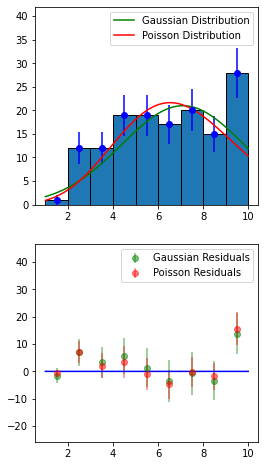

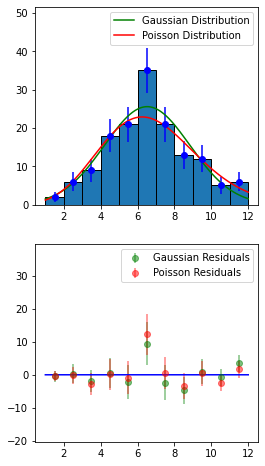

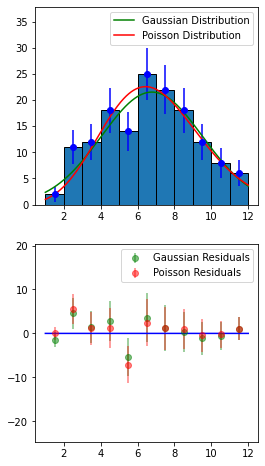

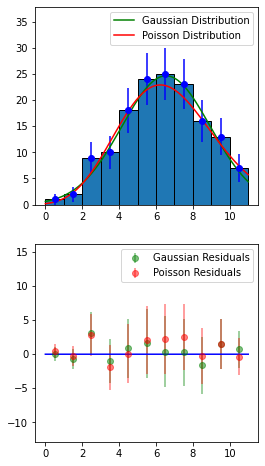

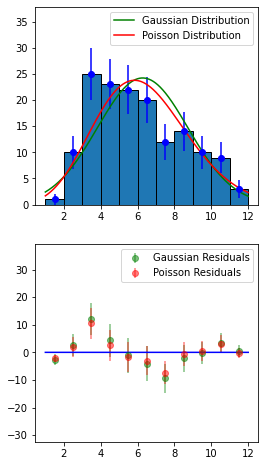

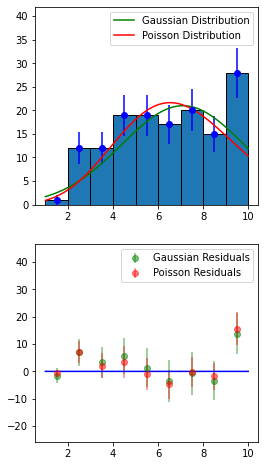

In [165]:
E4 = []
E4.append(np.genfromtxt("E4.csv", delimiter=",", usecols=(1), skip_header=1))
E4.append(np.genfromtxt("E4.csv", delimiter=",", usecols=(3), skip_header=1))
E4.append(np.genfromtxt("E4.csv", delimiter=",", usecols=(5), skip_header=1))
E4.append(np.genfromtxt("E4.csv", delimiter=",", usecols=(7), skip_header=1))
E4.append(np.genfromtxt("E4.csv", delimiter=",", usecols=(9), skip_header=1))
E4_sum = E4[0]
np.append(E4_sum,E4[1])
np.append(E4_sum,E4[2])
np.append(E4_sum,E4[3])
np.append(E4_sum,E4[4])
E4.append(E4_sum)
for x in E4:
    plt.figure(figsize=(4, 8))
    plt.subplot(2,1,1)
    n,bins,patches = plt.hist(x, density=False, edgecolor='black', bins = np.arange(min(x),max(x),1))
    x = np.linspace(min(bins)+0.5,max(bins)-0.5,len(n))
    nerr=n**0.5
    norm=sum(n)
    plt.errorbar(x,n,yerr=nerr,fmt='ob')
    popt,pcov = optimize.curve_fit(Gaussian,xdata=x, ydata=n,p0=[6.1,6,norm],bounds=((-np.inf,-np.inf,norm-0.0001), (np.inf,np.inf,norm)),sigma=nerr)
    perr = np.sqrt(np.diag(pcov))
    print("Gaussian Fit")
    print('Mean: '+str(popt[0])+' +/- '+str(perr[0]))
    print('Std: '+str(popt[1])+' +/- '+str(perr[1]))
    print('-'*50)
    gpopt=popt
    gperr=perr
    popt,pcov = optimize.curve_fit(Poisson,xdata=x, ydata=n, p0=[6.1,norm],bounds=((-np.inf,norm-0.0001), (np.inf,norm)),sigma=nerr)
    perr = np.sqrt(np.diag(pcov))
    print("Poisson Fit")
    print('Mean: '+str(popt[0])+' +/- '+str(perr[0]))
    print('='*50)
    ppopt=popt
    pperr=perr
    xs = np.linspace(min(bins),max(bins),2000)
    plt.plot(xs,Gaussian(xs,gpopt[0],gpopt[1],gpopt[2]),color='g',label='Gaussian Distribution')
    plt.plot(xs,Poisson(xs,ppopt[0],ppopt[1]),color='r',label='Poisson Distribution')
    gaussian_point=uGaussian(x,unc.ufloat(gpopt[0],gperr[0]),unc.ufloat(gpopt[1],gperr[1]),unc.ufloat(gpopt[2],gperr[2]))
    poisson_point=uPoisson(x,unc.ufloat(ppopt[0],pperr[0]),unc.ufloat(ppopt[1],pperr[1]))
    plt.legend(loc='upper right')
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin * 1.2, ymax * 1.2)
    plt.subplot(2,1,2)
    u_n=[]
    for i in np.linspace(0,len(n)-1,len(n)):
        i=int(i)
        u_n.append(unc.ufloat(n[i],nerr[i]))
    plt.errorbar(x, unumpy.nominal_values(u_n-gaussian_point),yerr=unumpy.std_devs(u_n-gaussian_point) ,fmt='go', alpha=0.5 ,label = "Gaussian Residuals")
    plt.errorbar(x, unumpy.nominal_values(u_n-poisson_point),yerr=unumpy.std_devs(u_n-poisson_point) ,fmt='ro', alpha=0.5 ,label = "Poisson Residuals")
    plt.plot(xs,[0]*xs,'b')
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin * 2, ymax * 2)
    plt.legend()
    plt.show